### Notebook for Bioinformatics for Biologists: Analysing and Interpreting Genomics Datasets : Week 1

### To install Miniconda on Ubuntu using a command-line interface, you can follow these steps:

**Download Miniconda:**
- Open your **terminal** and use `wget or curl` to download the Miniconda installer script. Replace <MINICONDA_VERSION> with the desired Miniconda version (e.g., "latest" or a specific version like "4.10.3"). You can check the latest version on the Miniconda website.

**Command:**
- `wget https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh`
- `curl -O https://repo.anaconda.com/miniconda/Miniconda3-latest-MacOSX-x86_64.sh`

**Run the Installer Script** using **Command:** 
- `bash Miniconda3-latest-Linux-x86_64.sh`

**Accept the License Terms:**

- Read the license terms and accept them by typing "yes" when prompted.

**Choose Installation Location:**

- You will be prompted to choose the installation location. The default location is usually your home directory. Press Enter to accept the default, or specify a different location if you prefer.

**Verify Installation:**
To verify that Miniconda has been installed correctly, you can run the following commands:

- `conda --version`
- `conda list`

1. If the installation is successful, you should see a list of installed packages with
2. If the command cannot be found, you can add the Anaconda bin to the path using following command:
- `export PATH=~/miniconda3/bin:$PATH`

### Importing conda environment with all required tools for the course:

a. Import conda environment from yml file. Please [download](https://www.futurelearn.com/links/f/9shs5409fm00sshumwoz2jijpxedtm7) and unzip the attached yml file
 before installing the environment and than run the following command: `conda env create -n MOOC --file MOOC.yml`
 
b. To activate the conda environment using the following command: `conda activate MOOC`


### Key steps of the analysis pipeline:
<div style="text-align:center">
    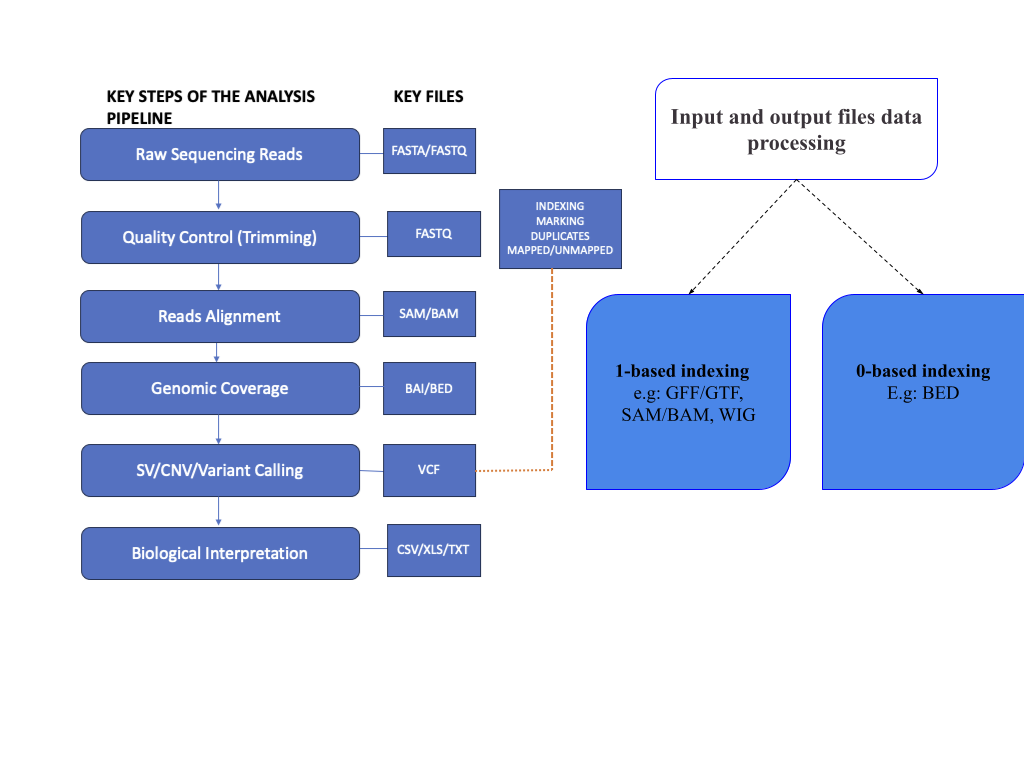
</div>

### Introduction to the Course Dataset:
- The Wuhan-1 reference sequence, which we’ll use when we map the sequence data for ERR5743893, is attached in a file named, [MN908947.fa](https://www.futurelearn.com/links/f/no858mqqw7cxpdgv3ko0eqohoo2p7qc)

- Download the dataset using the following command: `fastq-dump --split-files ERR5743893`

**Output:**
<div style="text-align:right">
    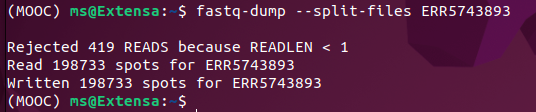
</div>

**Comments:** @Arhouna Siguina TRAORE

- The messages we got are related to the use of the fastq-dump command, which is a tool typically used to download FASTQ files from NCBI's Sequence Read Archive (SRA) database. Here's what these messages mean:

- "Rejected 419 READS because READLEN < 1": This means that 419 reads were rejected because their length (READLEN) was less than 1. In other words, there were reads whose length was either unknown or equal to zero, which is unusual.

- "Read 198,733 points for ERR5743893": This indicates that the fastq-dump tool read a total of 198,733 points (or spots) for sample "ERR5743893". These points correspond to readings extracted from the SRA database.

- "Written 198,733 points for ERR5743893": This means that the tool has written 198,733 points in FASTQ format for sample "ERR5743893". These points are now available as FASTQ files for further analysis.

- In summary, it appears that fastq-dump has successfully extracted the data for sample "ERR5743893" from the SRA database, although a few reads were rejected due to length issues. The extracted data are now ready to be used for further analysis.

**FASTQ file format:**
A FASTQ file defines each read by 4 lines:

- Line 1: Read sequence identifier (encoded descriptions of instrument, lane…)

- Line 2: Read sequence

- Line 3: « + » sign (optional: « + » followed by seq identifier)

- Line 4: a string of ASCII characters = Quality score associated to each Read
![OpenAI Logo](https://ugc.futurelearn.com/uploads/assets/1f/6e/large_hero_1f6ef1d4-8a38-4a2f-8f24-d850fd594431.png)

### Exercise and discussion

- First, let’s create a directory to save our fastQC outputs using the following command: `mkdir -p QC_Reports`
- Quality check using FastQC: now, run fastqc on the two fastq files we downloaded in the previous section (remember to activate the MOOC environment if you haven’t already)using the command: `fastqc ERR5743893_1.fastq ERR5743893_2.fastq --outdir QC_Reports`


**You will get the output similar to this:**


<div style="text-align:center">
    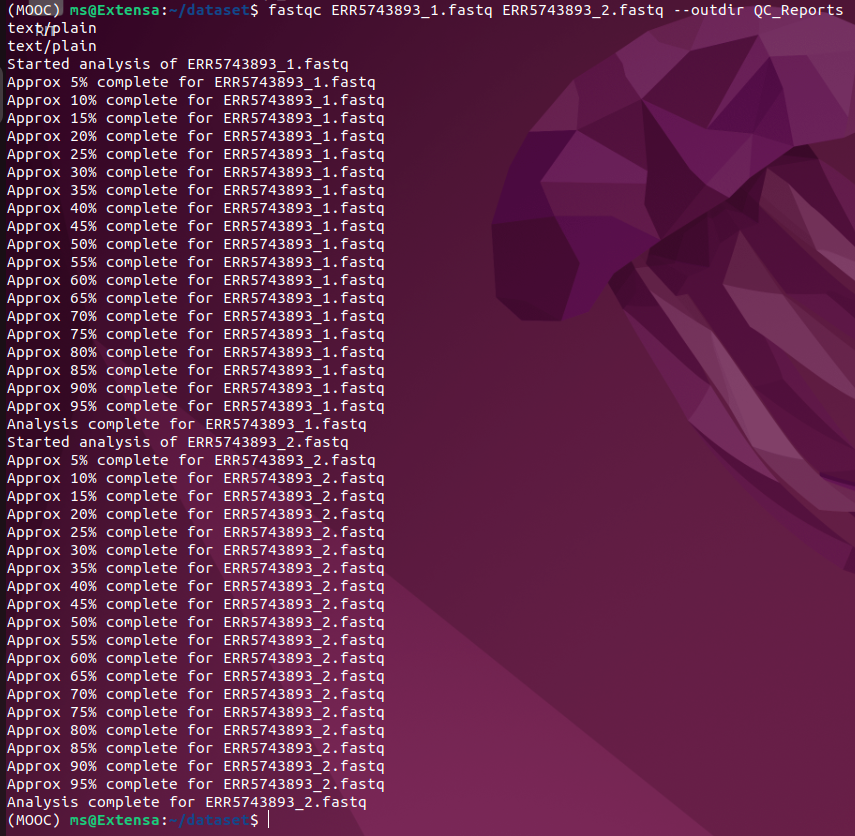
</div>

- Once fastqc has finished running, change to the QC_reports directory. You’ll see the following results files:


<div style="text-align:center">
    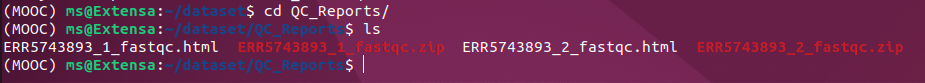
</div>

- To run the **multiQC** use the following command: `multiqc . `


<div style="text-align:center">
    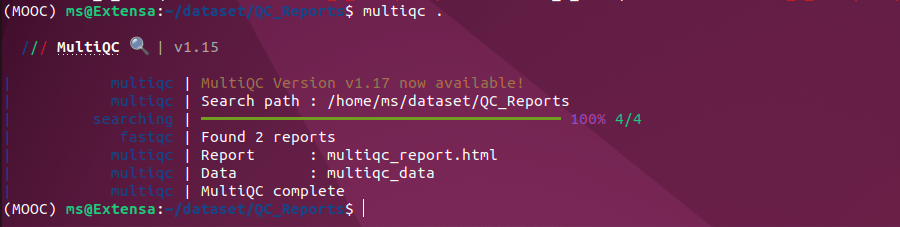
</div>

- Now open the **multiqc_report.html** in a web browser, and explore the different outputs from the multiqc report.

>Here are the **General Statistics** from MultiQC which is very close to FastQC:

>**Sample Name:** ERR5743893_1: % Dups: 95.3% | % GC: 39% | Median Read Length: 221 bp M Seqs:  0.2

>**Sample Name:**  RR5743893_2: % Dups: 94.1% | % GC: 39% | Median Read Length: 201 bp M Seqs:  0.2

### Mapping of the sample sequence

First let’s create a directory to store the results from BWA-MEM: 
>command: `mkdir Mapping`

**Indexing of the reference genome:**
>command: `bwa index MN908947.fasta`

**Output:**
<div style="text-align:center">
    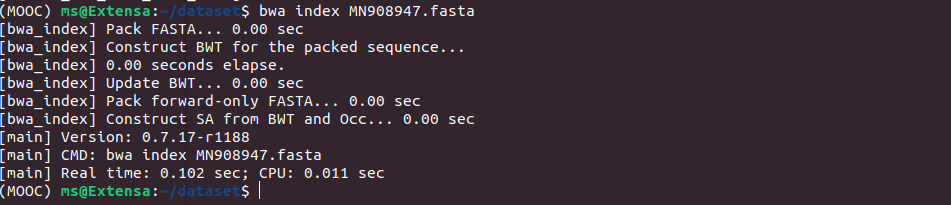
</div>

**Mapping to the sequences from our target sample to the reference genome:**
>command: bwa mem MN908947.fasta ERR5743893_1.fastq ERR5743893_2.fastq > Mapping/ERR5743893.sam

**Output:**
<div style="text-align:center">
    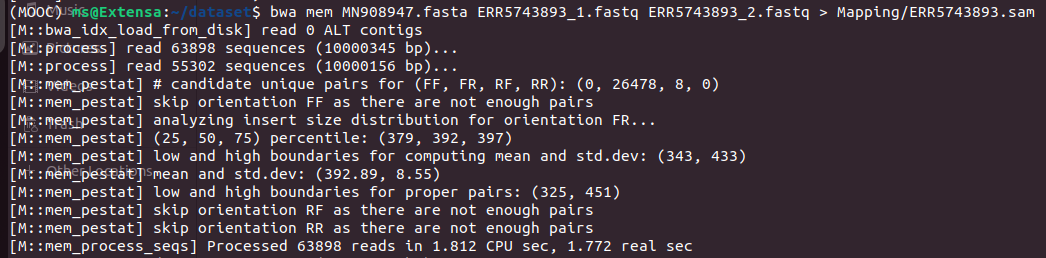
</div>

Once BWA MEM has finished running, change to the Mapping directory and list the files:

>command: `cd Mapping`

>command: `ls -lhrt`

**Output**


<div style="text-align:center">
    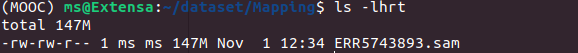
</div>

**Convert the SAM file to a BAM file**
>command: `samtools view -@ 20 -S -b Mapping/ERR5743893.sam > Mapping/ERR5743893.bam`

>@ - number of threads

>S - input is a SAM file

>b - output should be a BAM file


**Sorting BAM file of reads and mapping information ordered:**
>command: `samtools sort -@ 8 -o Mapping/ERR5743893.sorted.bam Mapping/ERR5743893.bam`

**index the sorted BAM file:**
>command: `samtools index Mapping/ERR5743893.sorted.bam`

>Now visualize your BAM file on Integrative Genomics Viewer [IGV-YouTube Link](https://youtu.be/die924mosh0) here.

**Variant Calling:**

>First we need to index the reference genome using samtools:
>command: `samtools faidx MN908947.fasta`

>Now, let’s use FreeBayes to identify the variants in our test sample:

>command: `freebayes -f MN908947.fasta Mapping/ERR5743893.sorted.bam  > ERR5743893.vcf`

**Compress and index the VCF file**
>command: `bgzip ERR5743893.vcf`

>command: `tabix ERR5743893.vcf.gz`


**Installing BCFtools**

Direct installation
>command: `sudo apt install bcftools` or

Install BCFtools in the active conda environment:
>command: `conda install -c bioconda bcftools`

Using Homebrew (macOS):
>command: `brew install bcftools`

**In case of error:** run the following command Below:

Here's an example of how to create a Conda environment with a specific version of OpenSSL:
> - `conda create -n bcftools_env`

> - `conda activate bcftools_env`

> - `conda install -c conda-forge openssl=1.0.2s bcftools`

Then, install bcltools using command: `sudo apt install bcftools`


**To Identify the variants run the following command:**
> - `bcftools view -o output_snps.vcf.gz -O z -v snps,indels ERR5743893.vcf.gz`
> - `bcftools query -f '%TYPE\n' ERR5743893.vcf.gz | sort | uniq -c`

**Output:** INDEL: 1 + SNPs: 75 total = 76


<div style="text-align:center">
    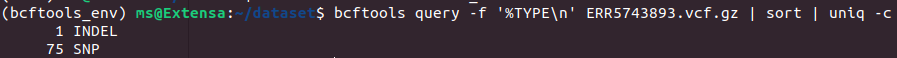
</div>